In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!pip install kagglehub

In [4]:
import kagglehub 

In [5]:
path = kagglehub.dataset_download("bhadaneeraj/cardio-vascular-disease-detection")

In [6]:
print("Path is "+path)

Path is C:\Users\rajar\.cache\kagglehub\datasets\bhadaneeraj\cardio-vascular-disease-detection\versions\1


In [121]:
df=pd.read_csv("cardio_train.csv",delimiter=';')

In [123]:
df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  988  22469       1     155    69.0    130     80            2     2      0   
1  989  14648       1     163    71.0    110     70            1     1      0   
2  990  21901       1     165    70.0    120     80            1     1      0   
3  991  14549       2     165    85.0    120     80            1     1      1   
4  992  23393       1     155    62.0    120     80            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       1       0  
3     1       1       0  
4     0       1       0

In [125]:
#age is in days so we convert in into years 
df['age']=df['age']/365;

## Removing outliers
We can use two techniques to remove outliers 
- Inter Quartile Range (IQR)
- Percentile method (considering data points between 2.5% to 97.5%)

### 1. IQR

In [127]:
def iqr_range(df, label):
    Q1, Q3 = df[label].quantile([0.25,0.75])
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return lower, upper

### Acceptable Range of different features using IQR

In [129]:
min_weight, max_weight = iqr_range(df,"weight")
min_height, max_height = iqr_range(df,"height")
min_ap_hi, max_ap_hi = iqr_range(df,"ap_hi")
min_ap_lo, max_ap_lo = iqr_range(df,"ap_lo")

df_cleaned = df[df['weight'].between(min_weight, max_weight)&df['height'].between(min_height, max_height)&df['ap_hi'].between(min_ap_hi, max_ap_hi)&df['ap_lo'].between(min_ap_lo, max_ap_lo) ]


In [131]:
df_cleaned.describe()
# Previously we have 70,000 data points which now reduced to 61,884 data points beacuse of removeal of outliers

id           age        gender        height        weight  \
count  61884.000000  61884.000000  61884.000000  61884.000000  61884.000000   
mean   50437.813312     53.406312      1.348458    164.407391     73.177365   
std    28578.590101      6.735683      0.476486      7.529037     12.264403   
min      988.000000     29.750685      1.000000    143.000000     40.000000   
25%    25628.750000     48.558219      1.000000    159.000000     65.000000   
50%    50477.500000     54.021918      1.000000    165.000000     72.000000   
75%    75106.500000     58.465753      2.000000    170.000000     81.000000   
max    99999.000000     64.967123      2.000000    186.000000    107.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  61884.000000  61884.000000  61884.000000  61884.000000  61884.000000   
mean     126.415907     81.698452      1.357572      1.220542      0.086274   
std       14.289828      7.672303      0.675170      0.567503      0.280771   
min       90.000000     65.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      1.000000      1.000000      0.000000   
max      170.000000    105.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  61884.000000  61884.000000  61884.000000  
mean       0.052275      0.804570      0.493763  
std        0.222583      0.396535      0.499965  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

In [28]:
df_cleaned.to_csv("cleaned_dataset.csv")

## Feature Selection and Reduction
Attributes with continuous values, such as age, height, weight, ap_hi, 
and ap_lo areeo converted into categorical value
- Age : The age data were then divided 
into bins of 5-year intervals, ranging from 0–20 to 95–10 
- BMI : BMI is calculated using height and weight
- MAP : Mean Arterial Pressure (MAP) is calculated by ap_hi and ap_lo 0s

#### Convering Age into bins

In [133]:

bins = [30, 35, 40, 45, 50, 55, 60, 65]  # Upper bound is exclusive
labels = ["30-35", "35-40", "40-45", "45-50", "50-55", "55-60", "60-65"]
labels= [1, 2, 3, 4, 5, 6, 7]

df_cleaned["Age_class"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)
df_cleaned.head()


C:\Users\rajar\AppData\Local\Temp\ipykernel_4880\2322082832.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Age_class"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)


id        age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0  988  61.558904       1     155    69.0    130     80            2     2   
1  989  40.131507       1     163    71.0    110     70            1     1   
2  990  60.002740       1     165    70.0    120     80            1     1   
3  991  39.860274       2     165    85.0    120     80            1     1   
4  992  64.090411       1     155    62.0    120     80            1     1   

   smoke  alco  active  cardio Age_class  
0      0     0       1       0         7  
1      0     0       1       1         3  
2      0     0       1       0         7  
3      1     1       1       0         2  
4      0     0       1       0         7

### Calculating BMI and creating bins of BMI

In [141]:
df_cleaned["height_m"] = df_cleaned["height"] / 100  # Convert height from cm to meters
df_cleaned["BMI"] = df["weight"] / (df_cleaned["height_m"] ** 2) 
df_cleaned = df_cleaned.drop(columns=["height_m"])

bins = [15, 20, 25, 30, 35, 40, 45, 50, 55]  # Upper bound is exclusive
labels = ["15-20", "20-25", "25-30", "30-35", "35-40", "40-45", "45-50","50-55"]
labels=[0, 1, 2, 3, 4, 5, 6, 7]

df_cleaned["BMI_class"] = pd.cut(df_cleaned["BMI"], bins=bins, labels=labels, right=False)
df_cleaned = df_cleaned.drop(columns=["BMI"])

df_cleaned.head()


age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  61.558904       1     155    69.0    130     80            2     2      0   
1  40.131507       1     163    71.0    110     70            1     1      0   
2  60.002740       1     165    70.0    120     80            1     1      0   
3  39.860274       2     165    85.0    120     80            1     1      1   
4  64.090411       1     155    62.0    120     80            1     1      0   

   alco  active  cardio Age_class BMI_class MAP_class  
0     0       1       0         7         2         2  
1     0       1       1         3         2         1  
2     0       1       0         7         2         2  
3     1       1       0         2         3         2  
4     0       1       0         7         2         2

### Calculating MAP and craeting bins of MAP
- Mean Arterial Pressure (MAP) = (2 Diastollic Blood Pressure + Sistolic Blood Pressure)/3
- map = (2*ap_lo + ap_hi)/3

In [143]:
df=df_cleaned

df_cleaned["map"] = (2*df_cleaned["ap_lo"] + df_cleaned["ap_hi"])/3
df_cleaned["map"].describe()

bins = [70, 80, 90, 100,110,120, 130]  # Upper bound is exclusive
labels = ["70-80", "80-90", "90-100", "100-110","110-120","120-130"]
labels=[0, 1, 2, 3, 4, 5]

df_cleaned["MAP_class"] = pd.cut(df_cleaned["map"], bins=bins, labels=labels, right=False)
df_cleaned = df_cleaned.drop(columns=["map"])
df_cleaned.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  61.558904       1     155    69.0    130     80            2     2      0   
1  40.131507       1     163    71.0    110     70            1     1      0   
2  60.002740       1     165    70.0    120     80            1     1      0   
3  39.860274       2     165    85.0    120     80            1     1      1   
4  64.090411       1     155    62.0    120     80            1     1      0   

   alco  active  cardio Age_class BMI_class MAP_class  
0     0       1       0         7         2         2  
1     0       1       1         3         2         1  
2     0       1       0         7         2         2  
3     1       1       0         2         3         2  
4     0       1       0         7         2         2

In [147]:
df_cleaned.describe()

age        gender        height        weight         ap_hi  \
count  61884.000000  61884.000000  61884.000000  61884.000000  61884.000000   
mean      53.406312      1.348458    164.407391     73.177365    126.415907   
std        6.735683      0.476486      7.529037     12.264403     14.289828   
min       29.750685      1.000000    143.000000     40.000000     90.000000   
25%       48.558219      1.000000    159.000000     65.000000    120.000000   
50%       54.021918      1.000000    165.000000     72.000000    120.000000   
75%       58.465753      2.000000    170.000000     81.000000    140.000000   
max       64.967123      2.000000    186.000000    107.000000    170.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  61884.000000  61884.000000  61884.000000  61884.000000  61884.000000   
mean      81.698452      1.357572      1.220542      0.086274      0.052275   
std        7.672303      0.675170      0.567503      0.280771      0.222583   
min       65.000000      1.000000      1.000000      0.000000      0.000000   
25%       80.000000      1.000000      1.000000      0.000000      0.000000   
50%       80.000000      1.000000      1.000000      0.000000      0.000000   
75%       90.000000      1.000000      1.000000      0.000000      0.000000   
max      105.000000      3.000000      3.000000      1.000000      1.000000   

             active        cardio  
count  61884.000000  61884.000000  
mean       0.804570      0.493763  
std        0.396535      0.499965  
min        0.000000      0.000000  
25%        1.000000      0.000000  
50%        1.000000      0.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000

In [170]:
### Drop unnecessary colums 
# df_cleaned = df_cleaned.drop(columns=["id"])
df_cleaned = df_cleaned.drop(columns=["age"])
df_cleaned = df_cleaned.drop(columns=["ap_lo"])
df_cleaned = df_cleaned.drop(columns=["ap_hi"])
df_cleaned = df_cleaned.drop(columns=["height"])
df_cleaned = df_cleaned.drop(columns=["weight"])

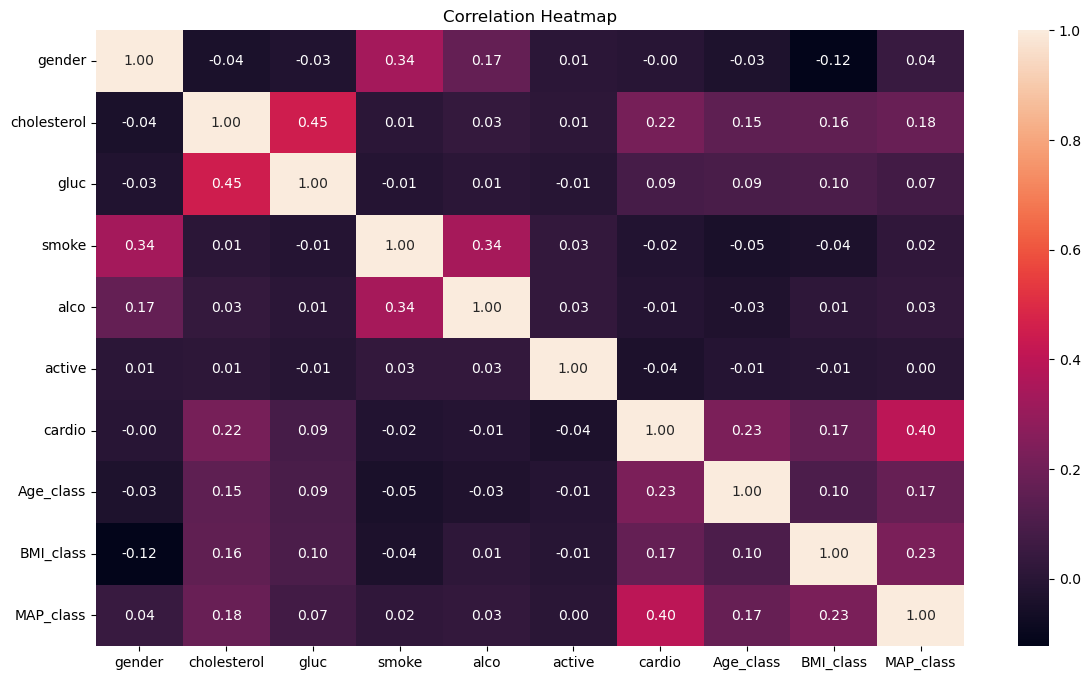

In [180]:
corr_matrix = df_cleaned.corr()

plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
